In [1]:
import cogsworth
import gala.potential as gp
import astropy.units as u
import matplotlib.pyplot as plt

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [3]:
p = cogsworth.pop.Population(n_binaries=100, processes=4, m1_cutoff=0,
                             final_kstar1=list(range(16)), final_kstar2=list(range(16)),
                             galaxy_model=cogsworth.galaxy.Wagg2022,
                             galactic_potential=gp.MilkyWayPotential(), v_dispersion=5 * u.km / u.s,
                             max_ev_time=12.0 * u.Gyr, timestep_size=1 * u.Myr,
                             BSE_settings={}, sampling_params={}, store_entire_orbits=True)

In [4]:
p = cogsworth.pop.Population(n_binaries=1000, processes=4, max_ev_time=12.0 * u.Gyr)

In [5]:
# now let's get the initital stellar population
p.sample_initial_binaries()
p._initial_binaries

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,tphysf,mass0_1,mass0_2,...,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,binfrac
0,0.0,0.0,0.300360,0.158019,6.774885,0.062877,0.004036,9283.031840,0.300360,0.158019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,1.0,1.0,1.283058,1.109808,1.421611,0.145430,0.017646,3384.785669,1.283058,1.109808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,1.0,1.0,21.827214,11.663874,8.514979,0.431495,0.010842,6374.304381,21.827214,11.663874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,0.0,0.0,0.087357,0.086545,6748.856829,0.564218,0.011250,9948.089420,0.087357,0.086545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,0.0,0.0,0.180060,0.167432,1.708300,0.477470,0.003735,8936.136065,0.180060,0.167432,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,0.0,0.0,0.591797,0.226255,2.436394,0.449320,0.008745,9280.478110,0.591797,0.226255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1238,1.0,1.0,2.652650,1.119520,1865.007246,0.326260,0.029978,1879.071139,2.652650,1.119520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1239,0.0,0.0,0.196439,0.148793,65.549841,0.341881,0.018278,1847.635738,0.196439,0.148793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1240,0.0,0.0,0.104532,0.082995,411.889495,0.778709,0.003320,4756.588070,0.104532,0.082995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


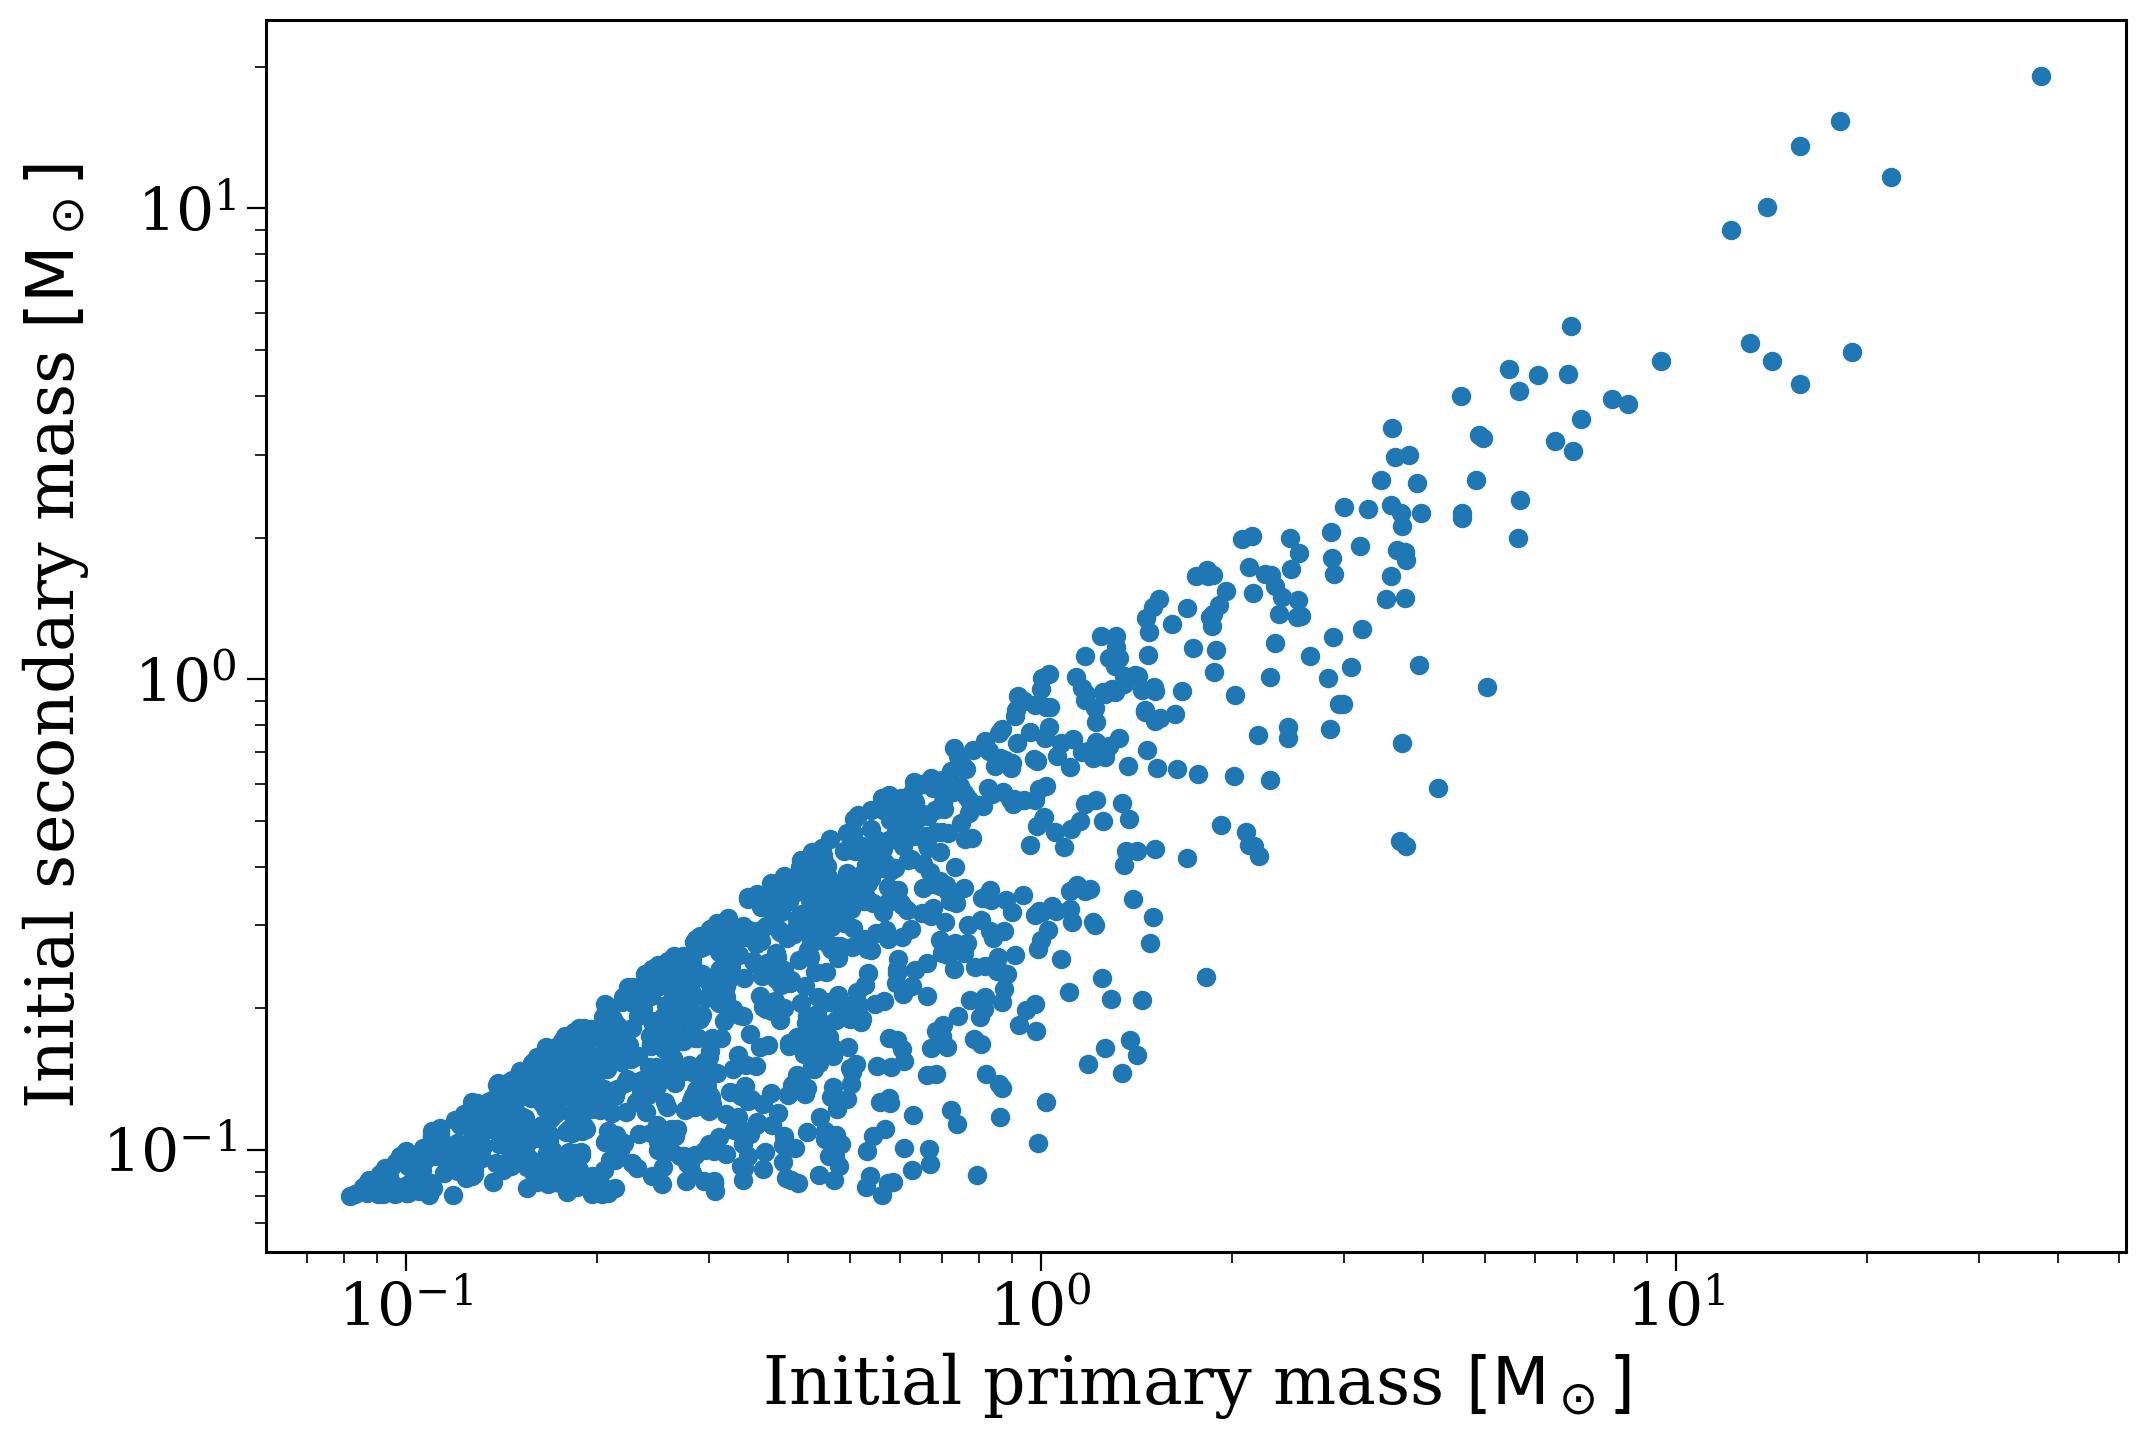

In [6]:
fig, ax = plt.subplots()
ax.scatter(p._initial_binaries["mass_1"], p._initial_binaries["mass_2"])
ax.set(xscale="log", yscale="log",
       xlabel=r"Initial primary mass $[\rm M_\odot]$", ylabel=r"Initial secondary mass $[\rm M_\odot]$")
plt.show()

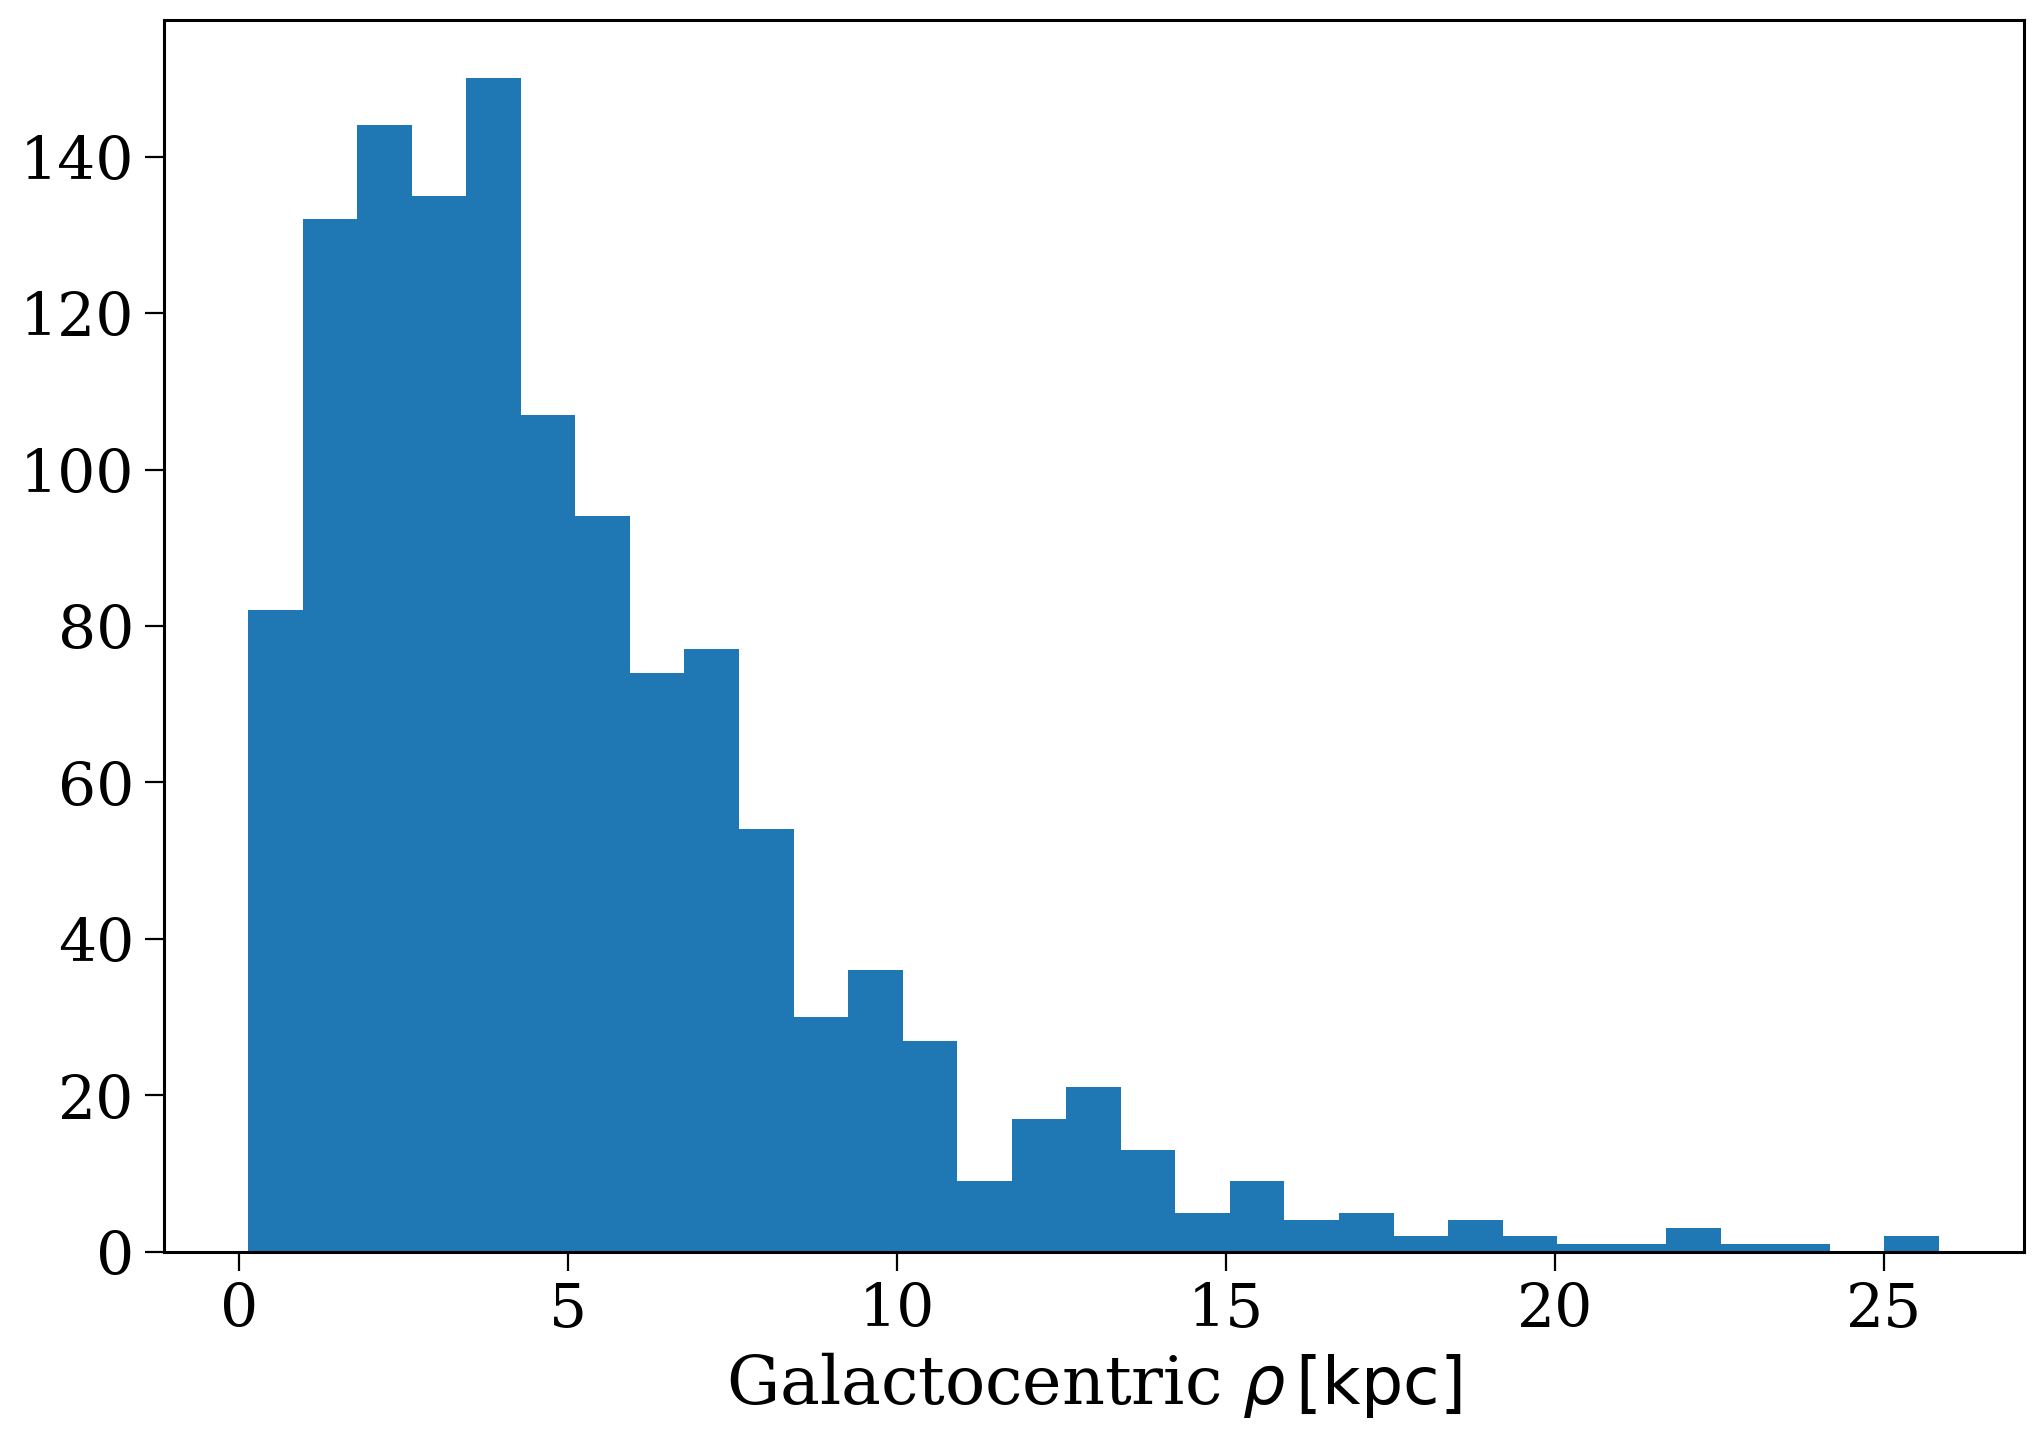

In [7]:
# first let's sample the initial galaxy
p.sample_initial_galaxy()

# and check distributions look normal
plt.hist(p.initial_galaxy.rho.value, bins="fd");
plt.xlabel(r"Galactocentric $\rho \, [\rm kpc]$");

In [8]:
p.perform_stellar_evolution()
p.bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,...,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.000000,0.300360,0.158019,0.0,0.0,11.613456,6.774885,0.062877,0.062761,0.052620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,9283.031840,0.300360,0.158019,0.0,0.0,11.613190,6.774652,0.062874,0.063146,0.052709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,1.283058,1.109808,1.0,1.0,7.113967,1.421611,0.145430,0.525978,0.453964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,3384.785669,1.283058,1.109808,1.0,1.0,6.884982,1.353528,0.000000,0.588646,0.450259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,21.827214,11.663874,1.0,1.0,56.543673,8.514979,0.431495,0.436563,0.397022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,1847.635738,0.196439,0.148793,0.0,0.0,47.977380,65.549839,0.341881,0.018056,0.016765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1239
1240,0.000000,0.104532,0.082995,0.0,0.0,133.299010,411.889495,0.778709,0.011825,0.014190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1240
1240,4756.588070,0.104532,0.082995,0.0,0.0,133.299009,411.889492,0.778709,0.011825,0.014190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1240
1241,0.000000,0.154031,0.093677,0.0,0.0,21.915413,23.890569,0.015410,0.019965,0.019830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1241


In [9]:
# print out some evolution information for the most massive binary
# we'll cover more on how this masking works in the next few tutorials
p.bpp.loc[p.initC[p.initC["mass_1"] == p.initC["mass_1"].max()]["bin_num"].iloc[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,...,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
53,0.000000,37.677998,19.156558,1.0,1.0,34.281593,3.085726,0.072795,0.586685,0.524988,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,53
53,3.921458,35.518222,19.073103,1.0,1.0,33.645741,3.061297,0.000000,1.001419,0.612840,...,0.0,0.0,0.0,0.0,0.0,-0.09708,-0.011081,0.0,0.0,53
53,3.921458,0.000000,54.591324,15.0,1.0,0.000000,0.000000,-1.000000,0.000000,-1.000000,...,0.0,0.0,0.0,0.0,0.0,-0.09708,3.336477,0.0,0.0,53
53,7.636651,0.000000,46.909975,15.0,2.0,0.000000,0.000000,-1.000000,-1.000000,0.000100,...,0.0,0.0,0.0,0.0,0.0,-0.09708,3.122130,0.0,0.0,53
53,7.641472,0.000000,46.405623,15.0,4.0,0.000000,0.000000,-1.000000,-1.000000,0.000100,...,0.0,0.0,0.0,0.0,0.0,-0.09708,3.122130,0.0,0.0,53
53,7.826834,0.000000,19.162886,15.0,7.0,0.000000,0.000000,-1.000000,-1.000000,0.000100,...,0.0,0.0,0.0,0.0,0.0,-0.09708,7.655627,0.0,0.0,53
53,8.116627,0.000000,13.848320,15.0,8.0,0.000000,0.000000,-1.000000,-1.000000,0.000100,...,0.0,0.0,0.0,0.0,0.0,-0.09708,7.592329,0.0,0.0,53
53,8.127657,0.000000,13.675387,15.0,8.0,0.000000,0.000000,-1.000000,-1.000000,0.000100,...,0.0,0.0,0.0,0.0,0.0,-0.09708,7.592329,0.0,0.0,53
53,8.127657,0.000000,12.181946,15.0,14.0,0.000000,0.000000,-1.000000,-1.000000,0.000100,...,0.0,0.0,0.0,0.0,0.0,-0.09708,8.127657,0.0,0.0,53
53,8478.549874,0.000000,12.181946,15.0,14.0,0.000000,0.000000,-1.000000,-1.000000,0.000100,...,0.0,0.0,0.0,0.0,0.0,-0.09708,8.127657,0.0,0.0,53


In [10]:
p.perform_galactic_evolution()
p.orbits

1249it [00:06, 193.10it/s]                                                                                                                                                                               


array([<Orbit cartesian, dim=3, shape=(7529,)>,
       <Orbit cartesian, dim=3, shape=(2472,)>,
       <Orbit cartesian, dim=3, shape=(7031,)>, ...,
       <Orbit cartesian, dim=3, shape=(8032,)>,
       <Orbit cartesian, dim=3, shape=(2709,)>,
       <Orbit cartesian, dim=3, shape=(10507,)>], dtype=object)

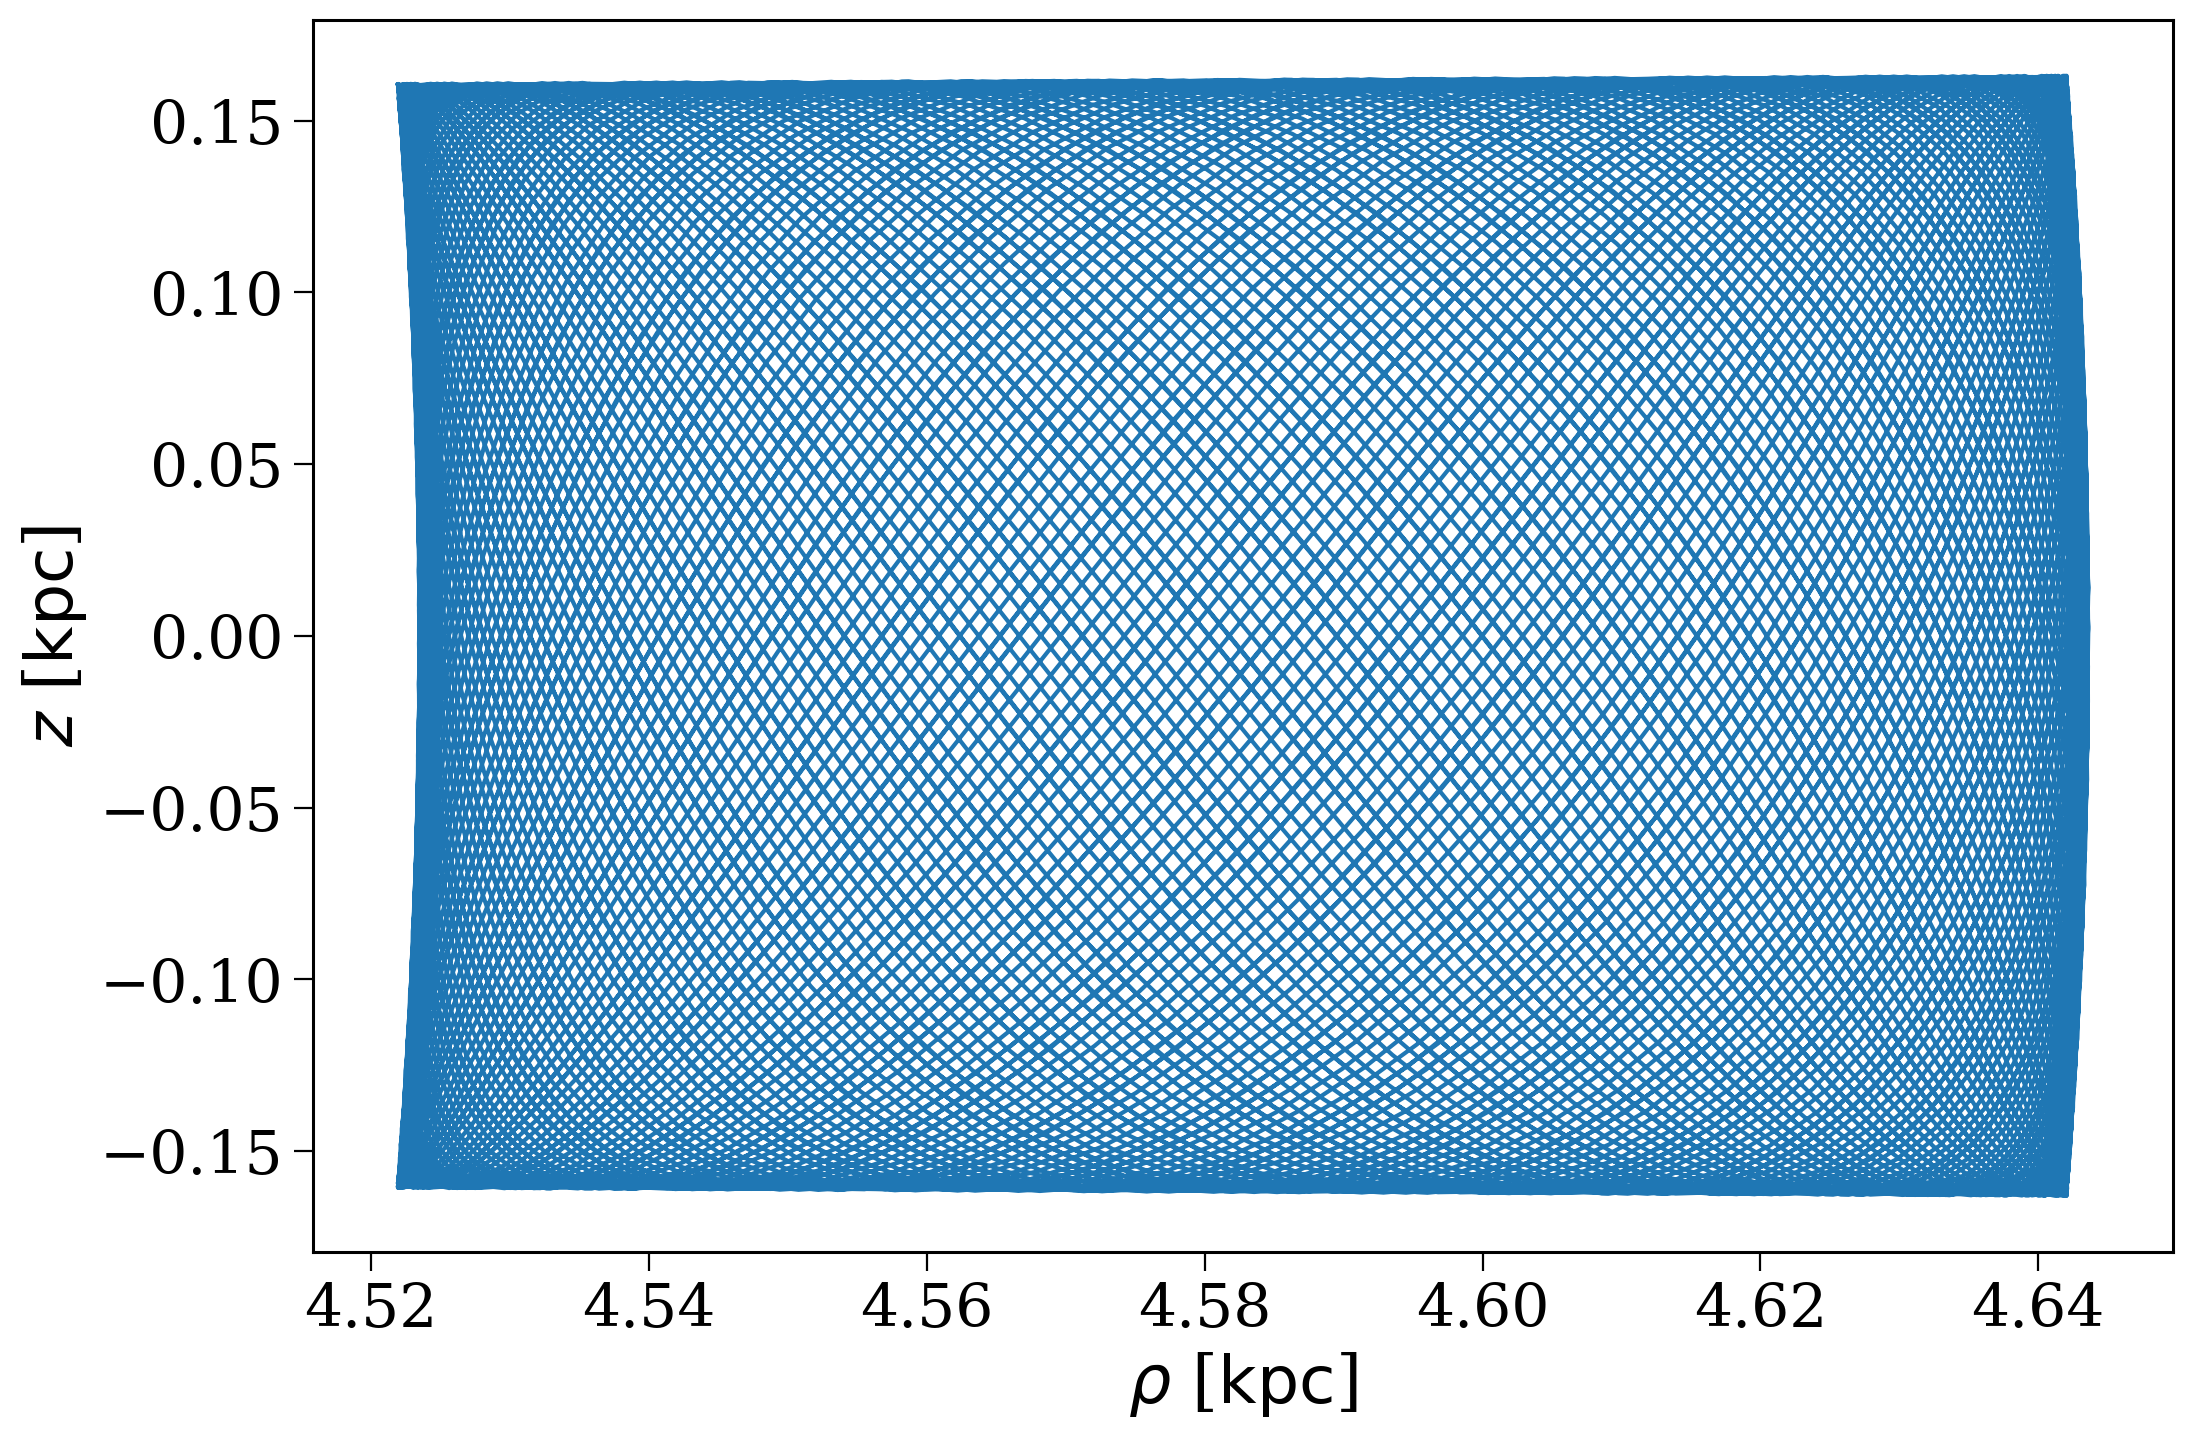

In [11]:
fig, ax = plt.subplots()
p.orbits[0].cylindrical.plot(["rho", "z"], axes=[ax]);

In [12]:
p.create_population()

Run for 1000 binaries
Ended up with 1315 binaries with m1 > 0 solar masses
[1e-02s] Sample initial binaries
[0.9s] Evolve binaries (run COSMIC)


1322it [00:07, 187.05it/s]                                                                                                                                                                               


[9.8s] Get orbits (run gala)
Overall: 10.7s


Check out the next tutorial to learn more about interpretting the outputs of these simulations.